# MatplotLib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

[*********************100%%**********************]  1 of 1 completed


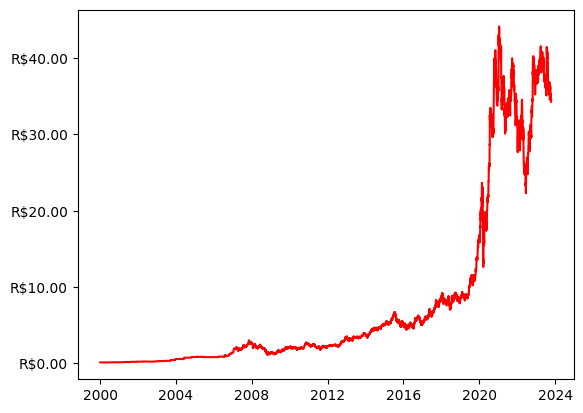

In [2]:
# cotacoes = yf.download(['WEGE3.SA', 'PETR4.SA', 'VALE3.SA', 'ASAI3.SA'])['Adj Close']
cotacoes = yf.download(['WEGE3.SA'])['Adj Close']

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = 'r')
ax.yaxis.set_major_formatter('R${x:1.2f}')
#'R${x:1.0f}' = R$40
#'R${x:1.2f}' = R$40,00

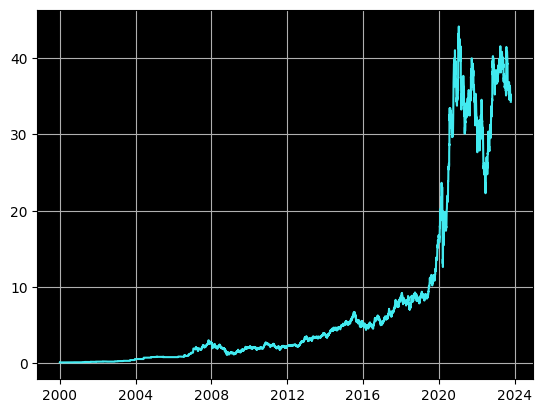

In [5]:
fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = '#42eaf0')
ax.set_facecolor('black')
ax.grid(True)

## Configurando cores por estilo

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

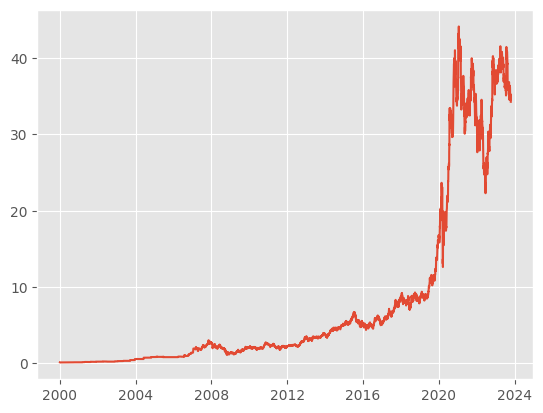

In [8]:
plt.style.use('ggplot')

fix, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values)

In [9]:
import mplcyberpunk
import matplotlib.ticker as mtick

plt.style.use('cyberpunk')

[*********************100%%**********************]  2 of 2 completed


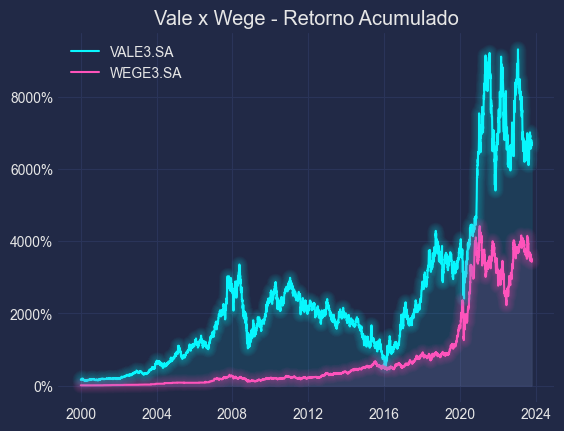

In [19]:
cotacoes= yf.download(['WEGE3.SA', 'VALE3.SA'])['Adj Close']

retorno_diario = cotacoes.pct_change().dropna()
retorno_acumulado = (retorno_diario +1).cumprod() - 1

fix, ax = plt.subplots()

for empresa in retorno_acumulado:
    ax.plot(cotacoes[empresa].index, cotacoes[empresa].values, label= empresa)

ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_title('Vale x Wege - Retorno Acumulado')

#mplcyberpunk.add_gradient_fill()
mplcyberpunk.add_glow_effects()

[*********************100%%**********************]  4 of 4 completed


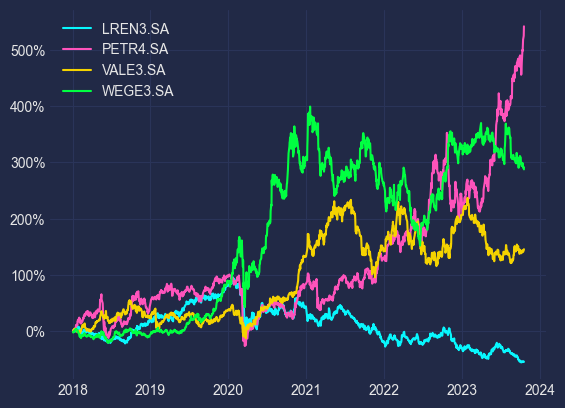

In [25]:
acoes = ['WEGE3.SA', 'PETR4.SA', 'LREN3.SA', 'VALE3.SA']

cotacoes = yf.download(acoes, '2018-01-01')['Adj Close']

retornos = cotacoes.pct_change().dropna()
retorno_acumulado = (retornos + 1).cumprod() - 1


fig, ax = plt.subplots()
for empresa in retorno_acumulado:
    ax.plot(retorno_acumulado[empresa].index, retorno_acumulado[empresa].values, label= empresa)


ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

## Desafio

In [52]:

acoes = ['WEGE3.SA', 'PETR4.SA', 'LREN3.SA', 'VALE3.SA', '^BVSP']
cotacoes_empresas = yf.download(acoes)['Adj Close']
cotacoes_ibov = yf.download('^BVSP')['Adj Close']

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12964\529054028.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = cotacoes_empresas.pct_change().dropna()


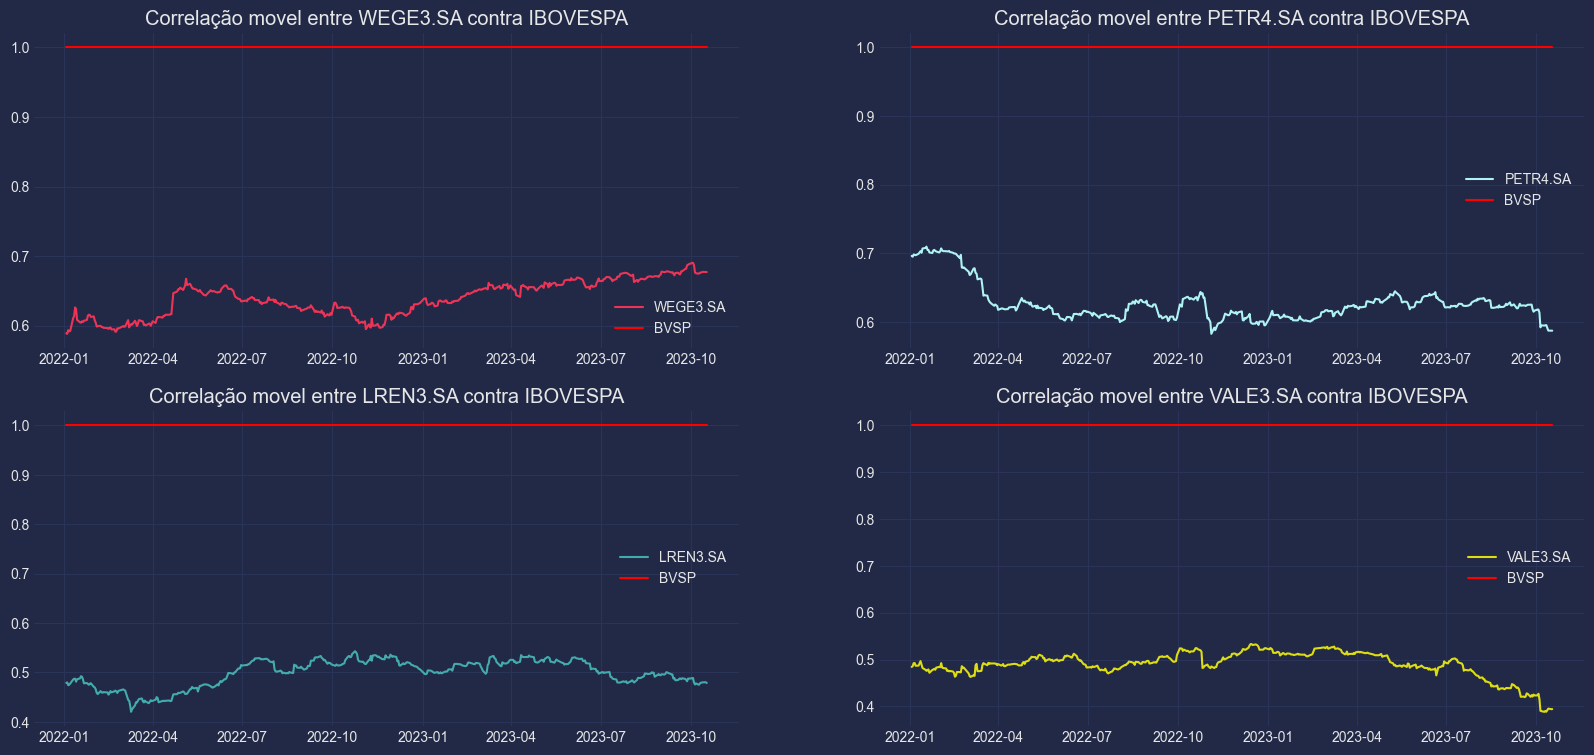

In [77]:
# fig, ax = plt.subplots()
retornos = cotacoes_empresas.pct_change().dropna()
retornos_ibov = cotacoes_ibov.pct_change().dropna()

#aplicando uma correlacao entre DFs com rolling
corr_movel = retornos.rolling(252).corr(retornos_ibov).dropna()

corr_movel = corr_movel[corr_movel.index.year >= 2022]

fig, ax = plt.subplots(2, 2, figsize = (20, 9))
cores =  ['#EE3456', '#AEF2F2', '#43ABAB', '#DDDD11']
ticker_index = 0
for i in range(2):
    for j in range(2):
        ax[i, j].plot(corr_movel.index, corr_movel.iloc[:,ticker_index], label= acoes[ticker_index], color = cores[ticker_index])
        ax[i, j].plot(corr_movel.index, corr_movel['^BVSP'], label= 'BVSP', color = 'r')
        ax[i, j].set_title(f'Correlação movel entre {acoes[ticker_index]} contra IBOVESPA')
        ax[i, j].legend()
        ticker_index += 1


